In [16]:
import torch
import numpy as np
from main import *
from torch.utils.data import DataLoader
from models.set_transformer import SetTransformer
from models.deepsets import DeepSetRegression
torch.manual_seed(0)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SetTransformer(2,1,1, num_heads=2, dim_hidden=32, ln = True)
model.load_state_dict(torch.load('Set_Transformer_heads2_hid32_ln.pth'))
model.to(device)

SetTransformer(
  (enc): Sequential(
    (0): ISAB(
      (mab0): MAB(
        (fc_q): Linear(in_features=32, out_features=32, bias=True)
        (fc_k): Linear(in_features=2, out_features=32, bias=True)
        (fc_v): Linear(in_features=2, out_features=32, bias=True)
        (ln0): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (ln1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (fc_o): Linear(in_features=32, out_features=32, bias=True)
      )
      (mab1): MAB(
        (fc_q): Linear(in_features=2, out_features=32, bias=True)
        (fc_k): Linear(in_features=32, out_features=32, bias=True)
        (fc_v): Linear(in_features=32, out_features=32, bias=True)
        (ln0): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (ln1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (fc_o): Linear(in_features=32, out_features=32, bias=True)
      )
    )
    (1): ISAB(
      (mab0): MAB(
        (fc_q): Linear(in_features=32, out_featur

In [5]:
test_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_30.npz', shuffle=True), batch_size=32, shuffle=True)
criterion = nn.MSELoss()
train_loss_shuffle = evaluate(model, criterion, test_loader, device)

In [7]:
train_loss_shuffle

0.016793017512791567

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = NN2(2048, 1, 8, 8, nn.ReLU).to(device)
train_loader = DataLoader(AntDataset('data/large/scaled_YZ_cost/YZ_Large_70_YZ_Cost_Scaled.npz'), batch_size=128, shuffle=True)
test_loader = DataLoader(AntDataset('data/large/scaled_YZ_cost/YZ_Large_30_YZ_Cost_Scaled.npz'), batch_size=128, shuffle=True)
criterion = nn.MSELoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr = lr)
num_epochs = 100
train_loss_inds, test_loss_inds = train_and_evaluate(model, optimizer, criterion,
                                           train_loader, test_loader,
                                           num_epochs, device)

Epoch 1 - Train Loss: 0.1933, Test Loss: 0.1202
Epoch 2 - Train Loss: 0.0625, Test Loss: 0.0461
Epoch 3 - Train Loss: 0.0462, Test Loss: 0.0504
Epoch 4 - Train Loss: 0.0396, Test Loss: 0.0937
Epoch 5 - Train Loss: 0.0364, Test Loss: 0.0321
Epoch 6 - Train Loss: 0.0320, Test Loss: 0.0335
Epoch 7 - Train Loss: 0.0307, Test Loss: 0.0256
Epoch 8 - Train Loss: 0.0301, Test Loss: 0.0323


KeyboardInterrupt: 

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = DeepSetRegression(2, 1, 1, 'robust_mean', dim_hidden=32).to(device)
train_loader = DataLoader(AntDataset2D('data/large/scaled_YZ_cost/YZ_Large_70_YZ_Cost_Scaled.npz'), batch_size=128, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/scaled_YZ_cost/YZ_Large_30_YZ_Cost_Scaled.npz'), batch_size=128, shuffle=True)
criterion = nn.MSELoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr = lr)
num_epochs = 100
train_loss_inds, test_loss_inds = train_and_evaluate(model, optimizer, criterion,
                                           train_loader, test_loader,
                                           num_epochs, device)

Epoch 1 - Train Loss: 0.6442, Test Loss: 0.3047
Epoch 2 - Train Loss: 0.3208, Test Loss: 0.4153
Epoch 3 - Train Loss: 0.2998, Test Loss: 0.3264
Epoch 4 - Train Loss: 0.2992, Test Loss: 0.2706
Epoch 5 - Train Loss: 0.2961, Test Loss: 0.2776
Epoch 6 - Train Loss: 0.3001, Test Loss: 0.2738
Epoch 7 - Train Loss: 0.2946, Test Loss: 0.3027
Epoch 8 - Train Loss: 0.2917, Test Loss: 0.3170
Epoch 9 - Train Loss: 0.2938, Test Loss: 0.2888
Epoch 10 - Train Loss: 0.2926, Test Loss: 0.2725
Epoch 11 - Train Loss: 0.2914, Test Loss: 0.2762
Epoch 12 - Train Loss: 0.2920, Test Loss: 0.2778
Epoch 13 - Train Loss: 0.2889, Test Loss: 0.2770
Epoch 14 - Train Loss: 0.2858, Test Loss: 0.2662
Epoch 15 - Train Loss: 0.2901, Test Loss: 0.3414
Epoch 16 - Train Loss: 0.2838, Test Loss: 0.3107
Epoch 17 - Train Loss: 0.2847, Test Loss: 0.2835
Epoch 18 - Train Loss: 0.2834, Test Loss: 0.2809
Epoch 19 - Train Loss: 0.2818, Test Loss: 0.3398
Epoch 20 - Train Loss: 0.2843, Test Loss: 0.2632
Epoch 21 - Train Loss: 0.2878

KeyboardInterrupt: 

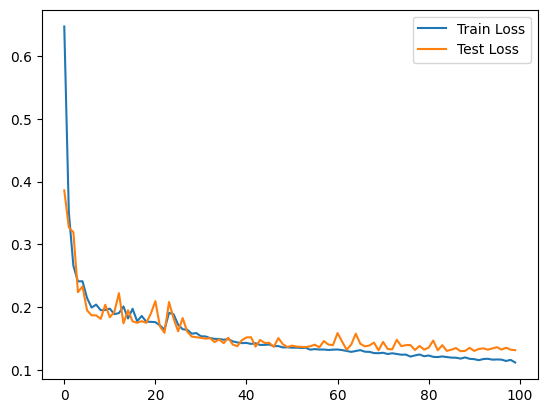

In [11]:
plt.plot(train_loss_inds, label = 'Train Loss')
plt.plot(test_loss_inds, label = 'Test Loss')
plt.legend()
plt.show()

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SetTransformer(2, 1, 1, num_heads= 2, num_inds = 32, dim_hidden=82).to(device)
train_loader = DataLoader(AntDataset2D('data/large/scaled_YZ_cost/YZ_Large_70_YZ_Cost_Scaled.npz'), batch_size=64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/scaled_YZ_cost/YZ_Large_30_YZ_Cost_Scaled.npz'), batch_size=64, shuffle=True)
criterion = nn.MSELoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr = lr)
num_epochs = 100
train_loss_inds, test_loss_inds = train_and_evaluate(model, optimizer, criterion,
                                           train_loader, test_loader,
                                           num_epochs, device)

Epoch 1 - Train Loss: 0.6874, Test Loss: 0.3766
Epoch 2 - Train Loss: 0.3807, Test Loss: 0.4633
Epoch 3 - Train Loss: 0.3634, Test Loss: 0.3265
Epoch 4 - Train Loss: 0.3428, Test Loss: 0.4126
Epoch 5 - Train Loss: 0.3482, Test Loss: 0.2921
Epoch 6 - Train Loss: 0.3246, Test Loss: 0.2958
Epoch 7 - Train Loss: 0.3207, Test Loss: 0.2862
Epoch 8 - Train Loss: 0.3126, Test Loss: 0.3145
Epoch 9 - Train Loss: 0.3105, Test Loss: 0.3526
Epoch 10 - Train Loss: 0.3006, Test Loss: 0.2627
Epoch 11 - Train Loss: 0.3086, Test Loss: 0.2784
Epoch 12 - Train Loss: 0.2985, Test Loss: 0.2683
Epoch 13 - Train Loss: 0.3076, Test Loss: 0.2786
Epoch 14 - Train Loss: 0.2970, Test Loss: 0.2779
Epoch 15 - Train Loss: 0.2982, Test Loss: 0.2787
Epoch 16 - Train Loss: 0.3051, Test Loss: 0.2824
Epoch 17 - Train Loss: 0.2979, Test Loss: 0.3578
Epoch 18 - Train Loss: 0.2940, Test Loss: 0.2702
Epoch 19 - Train Loss: 0.2951, Test Loss: 0.3202
Epoch 20 - Train Loss: 0.2913, Test Loss: 0.3308
Epoch 21 - Train Loss: 0.2940

In [15]:
train_loss_1, test_loss_1 = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, 1, device)

Epoch 1 - Train Loss: 0.1395, Test Loss: 0.1317


In [18]:
torch.save(model.state_dict(), 'set_transformer_heads2_inds32_hid82.pth')

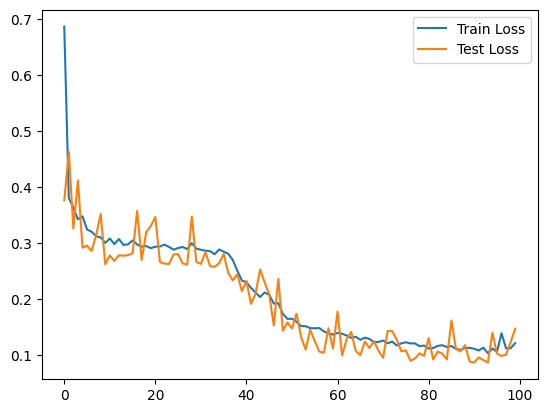

0.08705180173755185
93
0.11666957447363065


In [19]:
plt.plot(train_loss_inds, label = 'Train Loss')
plt.plot(test_loss_inds, label = 'Test Loss')
plt.legend()
plt.show()
print(np.min(test_loss_inds))
print(np.argmin(train_loss_inds))
print(train_loss_inds[82])

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SetTransformer(2, 1, 1, dim_hidden = 32,ln = True).to(device)
train_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_70.npz'), batch_size=64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_30.npz'), batch_size=64, shuffle=True)
criterion = nn.MSELoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr = lr)
num_epochs = 100
train_loss_inds, test_loss_inds = train_and_evaluate(model, optimizer, criterion,
                                           train_loader, test_loader,
                                           num_epochs, device)

KeyboardInterrupt: 

In [6]:
torch.save(model.state_dict(), 'Set_Transformer_heads2_hid32_ln.pth')

In [23]:
shuffle_test_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_30.npz', shuffle=True), shuffle = True)
test_loss_shuffle = evaluate(model, criterion, shuffle_test_loader, device)

ValueError: cannot reshape array of size 246 into shape (2,1024)

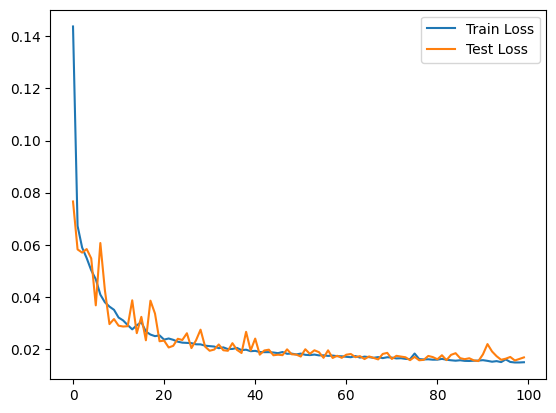

In [5]:
plt.plot(train_loss_inds, label = 'Train Loss')
plt.plot(test_loss_inds, label = 'Test Loss')
plt.legend()
plt.show()

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SetTransformer(2, 1, 1, num_inds=16, num_heads=2, dim_hidden = 32,ln = True).to(device)
train_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_70.npz'), batch_size=64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_30.npz'), batch_size=64, shuffle=True)
criterion = nn.MSELoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr = lr)
num_epochs = 100
train_loss_inds, test_loss_inds = train_and_evaluate(model, optimizer, criterion,
                                           train_loader, test_loader,
                                           num_epochs, device)

Epoch 1 - Train Loss: 0.1446, Test Loss: 0.1167
Epoch 2 - Train Loss: 0.0702, Test Loss: 0.0701
Epoch 3 - Train Loss: 0.0629, Test Loss: 0.0527
Epoch 4 - Train Loss: 0.0594, Test Loss: 0.0531
Epoch 5 - Train Loss: 0.0552, Test Loss: 0.0460
Epoch 6 - Train Loss: 0.0502, Test Loss: 0.0428
Epoch 7 - Train Loss: 0.0474, Test Loss: 0.0542
Epoch 8 - Train Loss: 0.0447, Test Loss: 0.0438
Epoch 9 - Train Loss: 0.0428, Test Loss: 0.0465
Epoch 10 - Train Loss: 0.0395, Test Loss: 0.0348
Epoch 11 - Train Loss: 0.0336, Test Loss: 0.0291
Epoch 12 - Train Loss: 0.0314, Test Loss: 0.0282
Epoch 13 - Train Loss: 0.0292, Test Loss: 0.0252
Epoch 14 - Train Loss: 0.0283, Test Loss: 0.0252
Epoch 15 - Train Loss: 0.0262, Test Loss: 0.0273
Epoch 16 - Train Loss: 0.0259, Test Loss: 0.0253
Epoch 17 - Train Loss: 0.0252, Test Loss: 0.0244
Epoch 18 - Train Loss: 0.0242, Test Loss: 0.0226
Epoch 19 - Train Loss: 0.0245, Test Loss: 0.0232
Epoch 20 - Train Loss: 0.0243, Test Loss: 0.0293
Epoch 21 - Train Loss: 0.0237

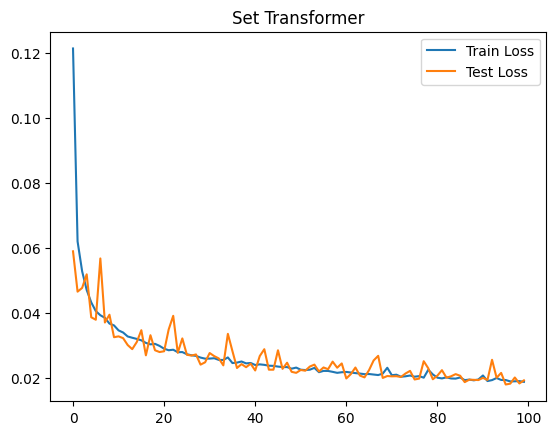

In [12]:
plt.plot(train_loss_inds, label = 'Train Loss')
plt.plot(test_loss_inds, label = 'Test Loss')
plt.title('Set Transformer')
plt.legend()
plt.show()

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SetTransformer(2, 1, 1, num_heads=2, dim_hidden = 16,ln = True).to(device)
train_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_70.npz'), batch_size=64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_30.npz'), batch_size=64, shuffle=True)
criterion = nn.MSELoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr = lr)
num_epochs = 100
train_loss_16, test_loss_16 = train_and_evaluate(model, optimizer, criterion,
                                           train_loader, test_loader,
                                           num_epochs, device)

Epoch 1 - Train Loss: 0.1453, Test Loss: 0.0715
Epoch 2 - Train Loss: 0.0687, Test Loss: 0.0612
Epoch 3 - Train Loss: 0.0604, Test Loss: 0.0528
Epoch 4 - Train Loss: 0.0551, Test Loss: 0.0486
Epoch 5 - Train Loss: 0.0524, Test Loss: 0.0419
Epoch 6 - Train Loss: 0.0478, Test Loss: 0.0450
Epoch 7 - Train Loss: 0.0422, Test Loss: 0.0405
Epoch 8 - Train Loss: 0.0402, Test Loss: 0.0342
Epoch 9 - Train Loss: 0.0382, Test Loss: 0.0358
Epoch 10 - Train Loss: 0.0365, Test Loss: 0.0350
Epoch 11 - Train Loss: 0.0359, Test Loss: 0.0332
Epoch 12 - Train Loss: 0.0341, Test Loss: 0.0290
Epoch 13 - Train Loss: 0.0339, Test Loss: 0.0303
Epoch 14 - Train Loss: 0.0328, Test Loss: 0.0316
Epoch 15 - Train Loss: 0.0328, Test Loss: 0.0287
Epoch 16 - Train Loss: 0.0319, Test Loss: 0.0276
Epoch 17 - Train Loss: 0.0313, Test Loss: 0.0298
Epoch 18 - Train Loss: 0.0306, Test Loss: 0.0346
Epoch 19 - Train Loss: 0.0306, Test Loss: 0.0356
Epoch 20 - Train Loss: 0.0296, Test Loss: 0.0282
Epoch 21 - Train Loss: 0.0292

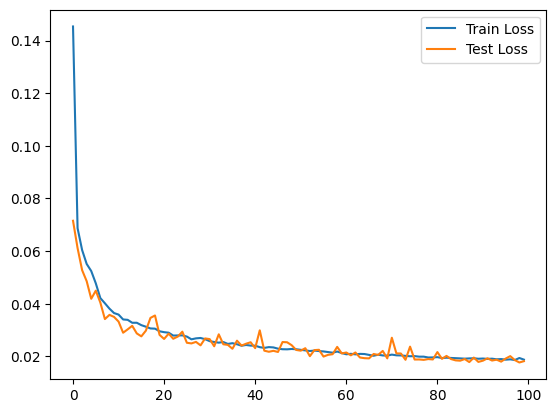

In [8]:
plt.plot(train_loss_16, label = 'Train Loss')
plt.plot(test_loss_16, label = 'Test Loss')
plt.legend()
plt.show()

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SetTransformer(2, 1, 1, num_heads=2, dim_hidden = 32,ln = True).to(device)
train_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_70.npz'), batch_size=64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_S_30.npz'), batch_size=64, shuffle=True)
criterion = nn.MSELoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr = lr)
num_epochs = 100
train_loss, test_loss = train_and_evaluate(model, optimizer, criterion,
                                           train_loader, test_loader,
                                           num_epochs, device)

Epoch 1 - Train Loss: 0.1161, Test Loss: 0.0865
Epoch 2 - Train Loss: 0.0615, Test Loss: 0.0568
Epoch 3 - Train Loss: 0.0583, Test Loss: 0.0519
Epoch 4 - Train Loss: 0.0547, Test Loss: 0.0523
Epoch 5 - Train Loss: 0.0504, Test Loss: 0.0445
Epoch 6 - Train Loss: 0.0487, Test Loss: 0.0462
Epoch 7 - Train Loss: 0.0461, Test Loss: 0.0405
Epoch 8 - Train Loss: 0.0444, Test Loss: 0.0399
Epoch 9 - Train Loss: 0.0421, Test Loss: 0.0412
Epoch 10 - Train Loss: 0.0417, Test Loss: 0.0408
Epoch 11 - Train Loss: 0.0393, Test Loss: 0.0446
Epoch 12 - Train Loss: 0.0384, Test Loss: 0.0491
Epoch 13 - Train Loss: 0.0388, Test Loss: 0.0353
Epoch 14 - Train Loss: 0.0373, Test Loss: 0.0374
Epoch 15 - Train Loss: 0.0369, Test Loss: 0.0355
Epoch 16 - Train Loss: 0.0355, Test Loss: 0.0342
Epoch 17 - Train Loss: 0.0347, Test Loss: 0.0333
Epoch 18 - Train Loss: 0.0339, Test Loss: 0.0312
Epoch 19 - Train Loss: 0.0334, Test Loss: 0.0317
Epoch 20 - Train Loss: 0.0321, Test Loss: 0.0293
Epoch 21 - Train Loss: 0.0319

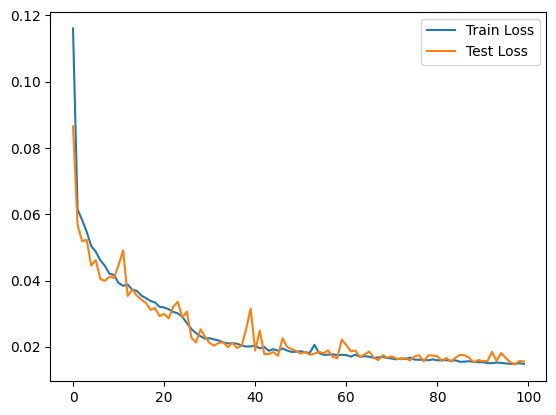

In [9]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

## Shuffle Antenna Test
We will shuffle the antennas within a pattern. In a sense, this shouldn't affect the cost, but this test will show whether a model is permutation invariant or not

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
test_loader_1D = DataLoader(AntDataset('data/large/scaled/YZ_Large_training.npz', shuffle = True), batch_size = 64, shuffle = True)
test_loader_2D = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_training.npz', shuffle = True), batch_size = 64, shuffle = True)
criterion = nn.MSELoss()

NN1 = SimpleNN(2048, 1, 8, nn.ReLU)
NN1.load_state_dict(torch.load('weights/FFNN/1NN_Weight.pt'))
NN1.to(device)
test_loss_NN1 = evaluate(NN1, criterion, test_loader_1D, device)

NN2 = NN2(2048, 1, 8, 8, nn.ReLU)
NN2.load_state_dict(torch.load('weights/FFNN/2NN_Weight.pt'))
NN2.to(device)
test_loss_NN2 = evaluate(NN2, criterion, test_loader_1D, device)

DeepSet = DeepSetRegression(2, 1, 1, pooling='robust_mean', dim_hidden= 64)
DeepSet.load_state_dict(torch.load('weights/DeepSet/DeepSet_Weight.pt'))
DeepSet.to(device)
test_loss_Deep = evaluate(DeepSet, criterion, test_loader_2D, device)

In [9]:
test_loss_NN1

2.631243312161816

In [10]:
test_loss_NN2

2.062378380909439

In [11]:
test_loss_Deep

0.012002272295673216

## Transformer Base Test

In [3]:
train_data_path = 'data/large/YZ_Large_testing.npz'
test_data_path = 'data/large/YZ_Large_training.npz'

torch.manual_seed(0)
train_loader = DataLoader(AntDataset2D(train_data_path), batch_size = 64, shuffle= True)
test_loader = DataLoader(AntDataset2D(test_data_path), batch_size = 64, shuffle = True)

print('Finish DataLoaders')

# Hyperparameters
d_model = 1024
nhead = 2
num_encoder_layers = 6
num_decoder_layers = 6
dim_feedforward = 1024
dropout = 0.1
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = TransformerRegressor(d_model, nhead,
                             num_encoder_layers,
                             num_decoder_layers,
                             dim_feedforward,
                             dropout).to(device)
print('Loaded Model')
learning_rate = 1e-3
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, epochs, device)

Finish DataLoaders
Loaded Model


/home/david/anaconda3/envs/torch/lib/python3.9/site-packages/torch/nn/modules/transformer.py:287: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Epoch 1 - Train Loss: 1.0906, Test Loss: 0.8875
Epoch 2 - Train Loss: 0.8954, Test Loss: 0.8836
Epoch 3 - Train Loss: 0.8903, Test Loss: 0.8839
Epoch 4 - Train Loss: 0.8881, Test Loss: 0.8795
Epoch 5 - Train Loss: 0.8862, Test Loss: 0.8795
Epoch 6 - Train Loss: 0.8858, Test Loss: 0.8795
Epoch 7 - Train Loss: 0.8856, Test Loss: 0.8795
Epoch 8 - Train Loss: 0.8860, Test Loss: 0.8802
Epoch 9 - Train Loss: 0.8855, Test Loss: 0.8794
Epoch 10 - Train Loss: 0.8861, Test Loss: 0.8799


KeyboardInterrupt: 

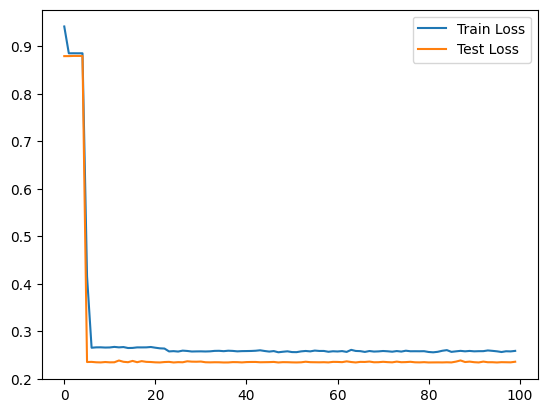

In [4]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

## 1-layer NN

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_data_path = 'YZ_Large_training.npz'
test_data_path = 'YZ_Large_testing.npz'
train_loader = DataLoader(AntDataset(train_data_path), batch_size=32, shuffle=True)
test_loader = DataLoader(AntDataset(test_data_path), batch_size=32, shuffle=True)

print('Loaded Data')

# Hyperparameters
model = SimpleNN(2048, 1, 8, nn.ReLU)
model.to(device)

learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

/home/david/anaconda3/envs/torch/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Loaded Data
Average Cost: 0.029260745272040367
Random Guess: 0.0003676150380014723
Epoch 1 - Train Loss: 0.0381, Test Loss: 0.0189
Average Cost: 0.02934732846915722
Random Guess: 0.0004268583046222516
Epoch 2 - Train Loss: 0.0145, Test Loss: 0.0138
Average Cost: 0.029246384277939796
Random Guess: 0.00044581261207937456
Epoch 3 - Train Loss: 0.0126, Test Loss: 0.0130
Average Cost: 0.029361430555582047
Random Guess: 0.0004775790203424595
Epoch 4 - Train Loss: 0.0114, Test Loss: 0.0119
Average Cost: 0.029377372935414314
Random Guess: 0.0004186142739180296
Epoch 5 - Train Loss: 0.0109, Test Loss: 0.0111
Average Cost: 0.029280079528689384
Random Guess: 0.0004268459763682636
Epoch 6 - Train Loss: 0.0103, Test Loss: 0.0111
Average Cost: 0.029285846278071404
Random Guess: 0.0004787548158552593
Epoch 7 - Train Loss: 0.0098, Test Loss: 0.0104
Average Cost: 0.02927250601351261
Random Guess: 0.00041671495926212513
Epoch 8 - Train Loss: 0.0095, Test Loss: 0.0110
Average Cost: 0.02937469631433487
Ra

In [3]:
two_layer = NN2(2048, 1, 8, 8, nn.ReLU)
two_layer.to(device)

learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(two_layer.parameters(), lr = learning_rate)

train_loss2, test_loss2 = train_and_evaluate(two_layer, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Average Cost: 0.029378963634371758
Random Guess: 0.0003208396791369874
Epoch 1 - Train Loss: 0.0609, Test Loss: 0.0161
Average Cost: 0.029388563707470894
Random Guess: 0.00022894685933370017
Epoch 2 - Train Loss: 0.0136, Test Loss: 0.0122
Average Cost: 0.029249003157019615
Random Guess: 0.00016045296704176324
Epoch 3 - Train Loss: 0.0109, Test Loss: 0.0111
Average Cost: 0.029342170804739
Random Guess: 0.0001386364516800641
Epoch 4 - Train Loss: 0.0104, Test Loss: 0.0095
Average Cost: 0.029341181740164757
Random Guess: 0.0001323832413583928
Epoch 5 - Train Loss: 0.0092, Test Loss: 0.0093
Average Cost: 0.029348960146307945
Random Guess: 0.00010970961095871431
Epoch 6 - Train Loss: 0.0088, Test Loss: 0.0092
Average Cost: 0.029401449486613274
Random Guess: 0.000103396453865566
Epoch 7 - Train Loss: 0.0088, Test Loss: 0.0090
Average Cost: 0.029271433129906654
Random Guess: 8.443119472888505e-05
Epoch 8 - Train Loss: 0.0086, Test Loss: 0.0085
Average Cost: 0.02930477447807789
Random Guess: 0

In [4]:
torch.save(model.state_dict(), 'NN1.pth')
torch.save(two_layer.state_dict(), 'NN2.pth')

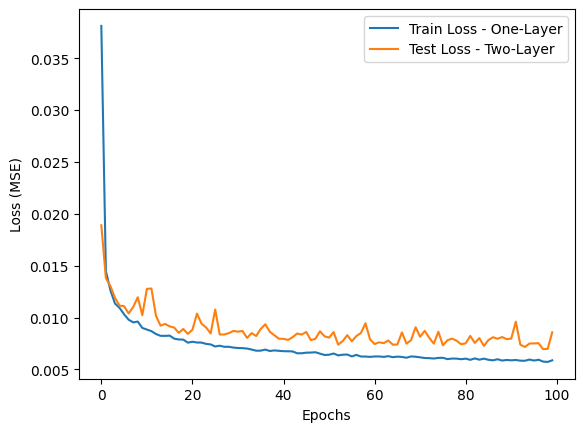

In [5]:
# Plot A and B on the same figure
plt.plot(train_loss, label = 'Train Loss - One-Layer')
plt.plot(test_loss, label='Test Loss - Two-Layer')

# Add axis labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Show the plot
plt.show()


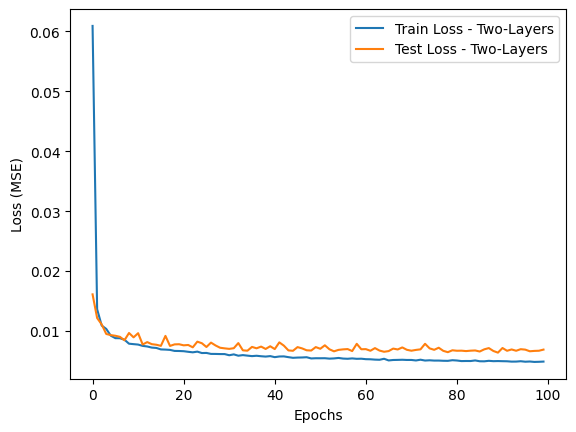

In [6]:
# Plot A and B on the same figure
plt.plot(train_loss2, label = 'Train Loss - Two-Layers')
plt.plot(test_loss2, label='Test Loss - Two-Layers')

# Add axis labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Show the plot
plt.show()


In [5]:
for (inp, out) in train_loader:
    src_mask = torch.any(inp != torch.tensor([0, 0], dtype=inp.dtype, device=inp.device), dim=-1)
    print(src_mask)
    print(src_mask.shape)
    break

tensor([[ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False]])
torch.Size([32, 1024])
